Hace falta algo que indique con qué entorno vamos a trabajar

**por ahora lo mejor es activar el entonrno que utilizamos en clases**


Importar lo que hace falta

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data_url = "../Data/properatti.csv"

In [3]:
data = pd.read_csv(data_url, encoding="utf-8")

In [4]:
data.shape

(121220, 26)

Confirmar los valores de la serie 'currency'

In [5]:
data['currency'].value_counts()

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

Retenemos sólo las observaciones que correspondan a 'USD'

In [6]:
data = data[data['currency'] == 'USD']

In [7]:
data.shape

(87587, 26)

Determinar si la serie 'price' es igual que 'price_aprox_usd'
La suma de valores True debe ser igual a la cantidad de observaciones

In [8]:
sum(data['price'] == data['price_aprox_usd'])

87587

No hacen falta las series currency, price_aprox_local_currency y price_aprox_usd

In [9]:
data = data.drop(['currency', 'price_aprox_local_currency', 'price_aprox_usd'], axis='columns')

In [10]:
data.shape

(87587, 23)

In [11]:
data.isnull().sum()

Unnamed: 0                     0
operation                      0
property_type                  0
place_name                    23
place_with_parent_names        0
country_name                   0
state_name                     0
geonames_id                16141
lat-lon                    35051
lat                        35051
lon                        35051
price                          0
surface_total_in_m2        27267
surface_covered_in_m2      10355
price_usd_per_m2           27454
price_per_m2               10357
floor                      81278
rooms                      51573
expenses                   74935
properati_url                  0
description                    1
title                          0
image_thumbnail             1542
dtype: int64

Determinar que ocurre con price y surface

---

Hasta aquí se copia de TP1.01

---

**Por ahora** se elimina outliers en la serie price

In [12]:
data['price'].describe()

count    8.758700e+04
mean     2.603735e+05
std      4.063580e+05
min      5.000000e+03
25%      1.000000e+05
50%      1.600000e+05
75%      2.900000e+05
max      4.654544e+07
Name: price, dtype: float64

Tenemos un mínimo en el órden de 4e+05 (4.000) USD que es bajo pero aceptable 

Tenemos un máximo de 4e+07 (40.000.000) USD que complica el primer análisis

In [13]:
data[data['price']>1e+07]['price'].shape

(12,)

In [14]:
data[data['price']>1e+06]['price'].shape

(2379,)

In [15]:
data[data['price']<1e+06]['price'].shape

(85125,)

Para el prototipo nos quedamos con los valores menores a 1e+06 (1.000.000) USD

In [16]:
data[data['price']<1e+06]['price'].describe()

count     85125.000000
mean     216743.304317
std      173693.915239
min        5000.000000
25%       98421.000000
50%      155000.000000
75%      270500.000000
max      999999.000000
Name: price, dtype: float64

In [17]:
data = data[data['price']<1e+06]

In [18]:
data.shape

(85125, 23)

In [19]:
data['price'].describe()

count     85125.000000
mean     216743.304317
std      173693.915239
min        5000.000000
25%       98421.000000
50%      155000.000000
75%      270500.000000
max      999999.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

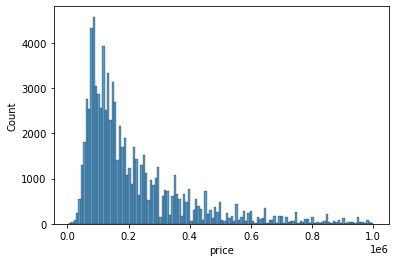

In [20]:
sns.histplot(data=data, x='price')

<AxesSubplot:xlabel='surface_covered_in_m2', ylabel='price'>

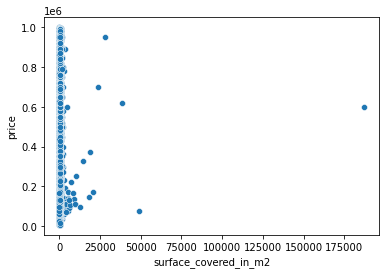

In [21]:
sns.scatterplot(x=data['surface_covered_in_m2'], y=data['price'])

Para mejorar el prototipo hay que revisar los outliers en otras series

In [22]:
data['surface_covered_in_m2'].describe()

count     75004.000000
mean        123.322209
std         760.587887
min           0.000000
25%          46.000000
50%          76.000000
75%         151.000000
max      187000.000000
Name: surface_covered_in_m2, dtype: float64